<a href="https://colab.research.google.com/github/Toshi-M56/PIDcontrol/blob/main/%E5%B7%A5%E5%AD%A6%E5%AE%9F%E9%A8%93PID%E5%88%B6%E5%BE%A1%E5%AE%9F%E9%A8%93%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# アクチュエーターのPID制御　実験シミュレーション

ここでは，工学実験2テーマ５　アクチュエータのPID制御の実験についてシミュレーションをしていきます．  

ちなみにこのホームページは[Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb?hl=ja)と呼ばれるGoogleが提供するサービスで，  
Googleが提供するサーバを使って自由にPythonプログラムを記述・実行することができます．  
Webブラウザさえあればいいため，環境構築の手間がなく，  
PCのスペックが低くてもネット環境さえあれば本格的なPythonプログラムを作成して実行することができます．

## 使い方
まず初めに，このページの使い方を簡単に学んでいきましょう．
下に灰色の四角いボックスがあると思います．
ここに，Pythonのプログラムを書いていきます．

次のセル（灰色の枠）をクリックして「Shift + Enter」とキーボードを打ってみてください．


In [118]:
x = 1
print(x)

1


「1」と表示されたと思います．

これで
*   xという変数に1を代入
*   xの中身を画面に表示

という二つの命令を実行するプログラムを動かしたことになります．

このように，非常に簡単にPythonを実行できるのができるのがColaboratoryの便利なところです．

ちなみに，「#〜〜〜」でコメントアウトができます．

この部分はプログラムとして実行されないため，メモ書きとして利用できます．

以降のプログラムには，理解しやすいように時々メモ書きを残しておきますので，ご活用ください．

In [30]:
# 2たす3を実行します
x = 2 + 3
print(x)

5


## シミュレーションの準備
プログラムが書けると，コンピューターに様々な処理を実行させることができます．しかし，膨大なプログラムの全ての処理を自分で書くのは大変です．そこで，ライブラリというすでに出来上がったプログラムを導入すると効率よくプログラムを作れます．

下のセルを実行してください．

「!pip 〜〜〜」という部分では，ライブラリをダウンロードし，

「import XXXXX as xx」という部分では，XXXXXというライブラリををxxという短い名前で使えるように導入しています．

細かいところは，今日は気にしないで大丈夫です．

In [19]:
!pip install control
!pip install japanize_matplotlib
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
import japanize_matplotlib
plt.style.use('bmh')

これで，

*   numpy (np) : 数値計算のためのライブラリ
*   matlab  : 制御に関するライブラリ
*   pyplot (plt) : グラフ表示に関するライブラリ
*   japanize_matplotlib (グラフに日本語を使うためのもの)

というライブラリを導入することができました．．


それでは早速matlab.tf()を使って以下のような伝達関数モデルを作りましょう．
$$ \frac{2}{s + 3} $$
以下を実行してください．

In [119]:
# ()内の[2]とか[1, 3]は，伝達関数の分子と分母の係数を意味しています．
G = matlab.tf([2], [1, 3]) 
print(G)


  2
-----
s + 3



このように，Gという変数に
$$\frac{2}{s+3}$$
という伝達関数を代入することができました．

そして，この関数のステップ応答を調べるには次のように実行します．

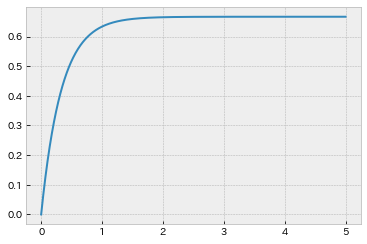

In [39]:
# 0から5までを1000刻みに分割した数列を用意している．つまり0sからから5sまでの時間．
t = np.linspace(0, 5, 1000) 

# matlab.step()はステップ応答を求める関数．()の中には伝達関数Gと時間の数列tを入れます．
# すると，制御量(yout)と時間(T)が得られます．(Tはtと同じです)
yout, T = matlab.step(G, t) 

# plt.plot()はグラフをプロットします．
# ()の中にはx軸の値とy軸の値が入ります．ここではTとyoutですね．
plt.plot(T, yout)  

さて，このように伝達関数Gからステップ応答を求め，グラフを描写する処理を何度も書くのも面倒なので，

関数にまとめてしまいましょう．
そこで，次のようなplot_step_response()という関数を作りました．

()の中に伝達関数Gを入れるだけで，ステップ応答をグラフにしてくれます．

興味がある人は中身を読んでみてください．

In [149]:
def plot_step_response(G, control="P", time=5, n_step=1000):
    t = np.linspace(0, time, n_step) #時間の数列を作る time秒間を n_step分割で
    yout, T = matlab.step(G, t)  # ステップ応答を求める
    d_yout = (yout[1:] - yout[:-1])/(time/n_step) #位置の情報youtから 速度の情報情報d_youtを求める

    fig = plt.figure(figsize=(6,8))
    ax = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax.plot(T, yout, c="blue", label="位置")
    ax.legend()
    ax.axhline(1, color="black", linestyle="--")
    ax.set_ylabel("位置", fontsize=20)
    ax_v = ax.twinx()
    ax_v.plot(T[1:], d_yout, c="r", label="速度")
    ax_v.set_ylabel("速度", fontsize=20)
    ax_v.legend()

    p_mvalue = (1-yout)*Kp
    d_mvalue = -d_yout*Kd
    ax2.plot(T,p_mvalue, c="blueviolet", label="P制御")
    if control == "PD":
        ax2.plot(T[:-1],d_mvalue, c="orange", label="D制御")
        ax2.plot(T[:-1],p_mvalue[:-1] + d_mvalue, c="green", label="PD制御") 
    ax2.axhline(0, color="black", linestyle="--")   
    ax2.legend()
    ax2.set_xlabel("時間[s]", fontsize=20)
    plt.show()

## P制御のシミュレーション
それではさっそくP制御のシミュレーションを実行していきましょう．




   1.4
---------
s^2 + 1.4



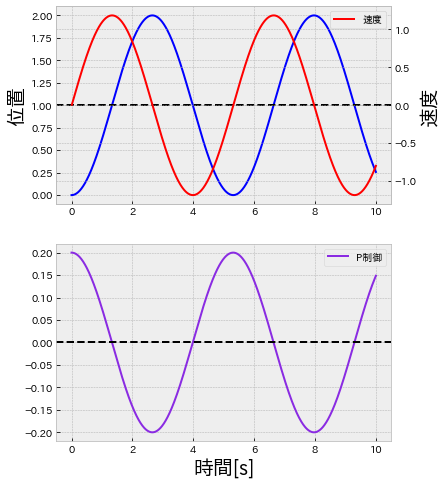

In [150]:
Kp = 0.2
G = matlab.tf([7*Kp], [1, 0, 7*Kp])
print(G)

plot_step_response(G, control="P", time=10)

グラフが表示されたと思います．それぞれ

青：位置，　赤：速度，　紫：P制御の操作量

となっています．
グラフから気がつくことはありますか？

次の点についてグラフを観察しながら考えてみてください．

*   位置とP制御の操作量の関係
*   波形の周期ととKpの関係
*   位置と速度の関係

また，Kpの値を0.2, 0.4, 0.6, 0.8, 1.0と変えていくと何が起きますか？



##PD制御のシミュレーション
次に，PD制御のシミュレーションを実行していきましょう．


   2.8 s + 2.8
-----------------
s^2 + 2.8 s + 2.8



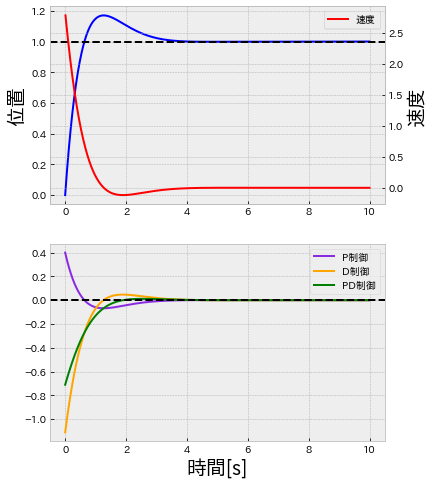

In [154]:
Kp = 0.4
Kd = 0.4
G = matlab.tf([7*Kd, 7*Kp], [1, 7*Kd, 7*Kp])
print(G)

plot_step_response(G, control="PD", time=10)

グラフが表示されたと思います．それぞれ

青：位置，　赤：速度，　紫：P制御の操作量，　橙：D制御の操作量，　緑：PD制御の操作量

となっています．
グラフから気がつくことはありますか？

次の点についてグラフを観察しながら考えてみてください．

*   位置とP制御の操作量の関係
*   速度とD制御の操作量の関係
*   P制御，D制御，PD制御それぞれの関係

また，Kdの値を0.1, 0.2, 0.3, 0.4, 0.478, 0.5, 0.6と変えていくと何が起きますか？

0.47809144373375745

In [16]:
def function(t, Kp, Kd):
    D = 12.25*Kd**2 - 7*Kp
    if D > 0:
        beta = np.sqrt(12.25*Kd**2 - 7*Kp)
        print(Kp, Kd, beta)
        p1 = -3.5*Kd + beta
        p2 = -3.5*Kd - beta
        return 1 - (1 / (2*beta))* (p1*np.exp(p1*t) - p2*np.exp(p2*t))
    elif D < 0:
        omega = np.sqrt(-12.25*Kd**2 + 7*Kp)
        return 1 - np.exp(-3.5*Kd*t) * (np.cos(omega*t) - (3.5*Kd/omega)*np.sin(omega*t))

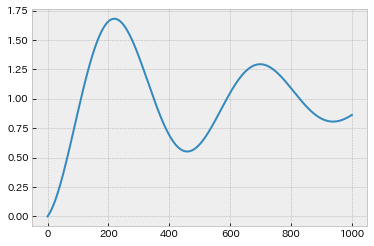

In [18]:
Kp = 1.0
Kd = 0.1
t = np.linspace(0, 5, 1000)
yout = function(t, Kp, Kd)
plt.plot(yout)